<h3>Importing Packages</h3>

In [1]:
# Handling Data
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Machine Learning
from sklearn.preprocessing import StandardScaler # Scaling
from sklearn.preprocessing import OrdinalEncoder # Convert Categorical Data
from sklearn.model_selection import train_test_split # Train Test Split

# Metrics
from sklearn.metrics import accuracy_score # Scoring Models Accuracy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# Models
from sklearn.neighbors import KNeighborsClassifier as KNN # K-Nearest Neighbors
from sklearn.svm import SVC                               # Support Vector Classifier
from sklearn.ensemble import RandomForestClassifier as RF # Random Forest Classifier
from sklearn.tree import DecisionTreeClassifier as DT     # Decision Tree Classifier


<h3>Importing Data</h3>

In [2]:
path = r'heart.csv'
df = pd.read_csv(path)

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<h3>Data Shape </h3>

In [3]:
print(f'{df.shape[0]} Rows, {df.shape[1]} Columns')

918 Rows, 12 Columns


<h3> Data types information </h3>

In [4]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

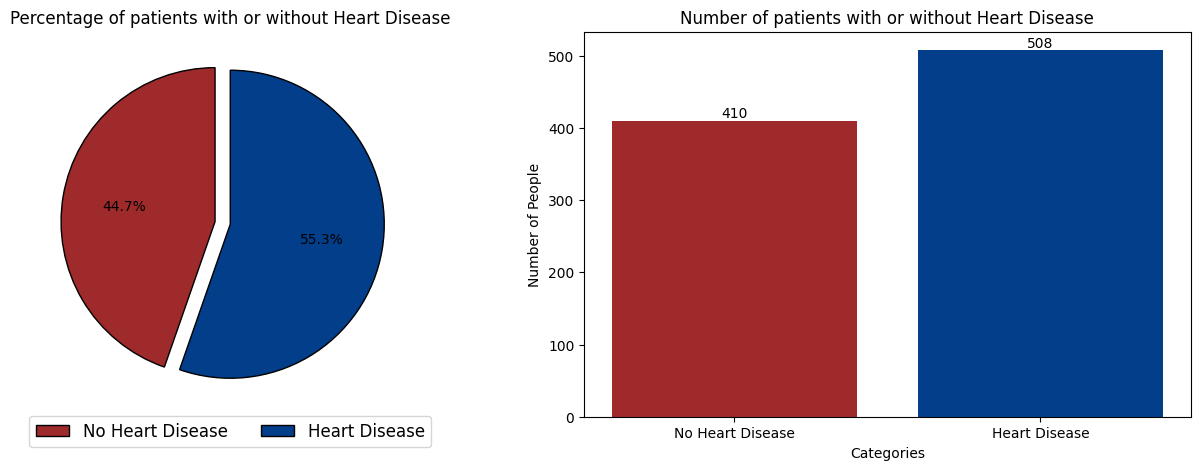

In [5]:
import matplotlib.pyplot as plt

l = list(df['HeartDisease'].value_counts())
circle = [l[1], l[0]]

categories = ['No Heart Disease', 'Heart Disease']
colors = ['#9e2a2b', '#023e8a']

# Create subplots with adjusted aspect ratio
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 1.5]})

# Pie chart
wedges, texts, autotexts = ax1.pie(circle, labels=None, autopct='%1.1f%%', startangle=90, explode=(0.1, 0),
                                   colors=colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
ax1.set_title('Percentage of patients with or without Heart Disease')

# Create legend for the pie chart with larger font size
ax1.legend(wedges, categories, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=2,
           prop={'size': 12})  # Adjust the font size as desired

# Bar plot with total numbers
ax2.bar(categories, circle, color=colors)
ax2.set_xlabel('Categories')
ax2.set_ylabel('Number of People')
ax2.set_title('Number of patients with or without Heart Disease')

# Add numbers on top of each bar
for i in range(len(categories)):
    ax2.text(i, circle[i], str(circle[i]), ha='center', va='bottom')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Show the combined plot
plt.show()


<h3>Create a copy of the dataframe</h3>

In [6]:
df1 = df.copy()

In [7]:
df1.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
df1.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
df1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [10]:
from sklearn.preprocessing import LabelEncoder

column_name = 'ST_Slope'  # Replace 'your_column_name' with the actual name of the column

# Create a new LabelEncoder instance
label_encoder = LabelEncoder()

# Fit the LabelEncoder to the column and transform the values
encoded_labels = label_encoder.fit_transform(df1[column_name])

# Retrieve the original categorical values
original_values = label_encoder.inverse_transform(encoded_labels)

# Print the mapping between original values and encoded labels
for original, encoded in zip(original_values, encoded_labels):
    print(f'{original} --> {encoded}')


Up --> 2
Flat --> 1
Up --> 2
Flat --> 1
Up --> 2
Up --> 2
Up --> 2
Up --> 2
Flat --> 1
Up --> 2
Up --> 2
Flat --> 1
Up --> 2
Flat --> 1
Up --> 2
Flat --> 1
Flat --> 1
Up --> 2
Flat --> 1
Flat --> 1
Up --> 2
Flat --> 1
Up --> 2
Flat --> 1
Up --> 2
Up --> 2
Flat --> 1
Up --> 2
Up --> 2
Up --> 2
Flat --> 1
Up --> 2
Flat --> 1
Flat --> 1
Up --> 2
Up --> 2
Flat --> 1
Up --> 2
Up --> 2
Flat --> 1
Up --> 2
Flat --> 1
Up --> 2
Up --> 2
Flat --> 1
Flat --> 1
Up --> 2
Up --> 2
Flat --> 1
Flat --> 1
Flat --> 1
Flat --> 1
Up --> 2
Up --> 2
Flat --> 1
Up --> 2
Flat --> 1
Flat --> 1
Up --> 2
Flat --> 1
Up --> 2
Up --> 2
Up --> 2
Flat --> 1
Up --> 2
Up --> 2
Up --> 2
Up --> 2
Flat --> 1
Up --> 2
Flat --> 1
Up --> 2
Flat --> 1
Up --> 2
Flat --> 1
Up --> 2
Flat --> 1
Up --> 2
Up --> 2
Flat --> 1
Up --> 2
Up --> 2
Flat --> 1
Up --> 2
Flat --> 1
Flat --> 1
Flat --> 1
Flat --> 1
Flat --> 1
Flat --> 1
Up --> 2
Up --> 2
Up --> 2
Flat --> 1
Up --> 2
Flat --> 1
Up --> 2
Up --> 2
Up --> 2
Up --> 2
Flat --> 1
U

In [11]:
df1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in df1.select_dtypes(include=['object']).columns:
    df1[i] = label_encoder.fit_transform(df1[i])

In [13]:
df1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int32  
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int32  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int32(5), int64(6)
memory usage: 68.3 KB


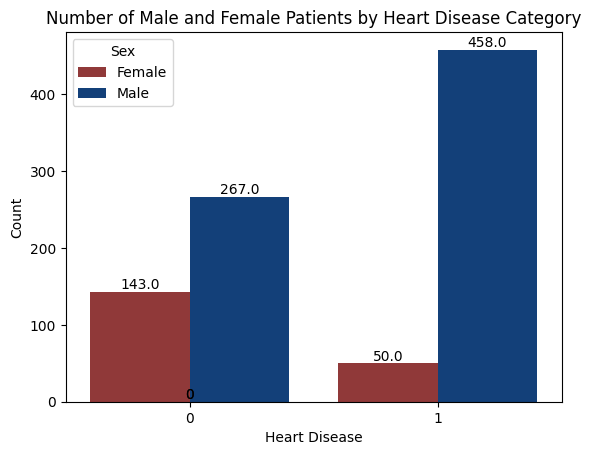

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt


# Set custom color palette
custom_palette = ['#9e2a2b', '#023e8a']

# Create count plot
sns.countplot(data=df1, x='HeartDisease', hue='Sex', palette=custom_palette)

# Set labels and title
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title('Number of Male and Female Patients by Heart Disease Category')

# Customize legend labels
legend_labels = ['Female', 'Male']
plt.legend(title='Sex', labels=legend_labels)

# Add numbers on top of the bars
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(str(height), (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

# Show the plot
plt.show()


In [16]:
df1.dtypes

Age                 int64
Sex                 int32
ChestPainType       int32
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int32
MaxHR               int64
ExerciseAngina      int32
Oldpeak           float64
ST_Slope            int32
HeartDisease        int64
dtype: object

In [17]:
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


<Axes: >

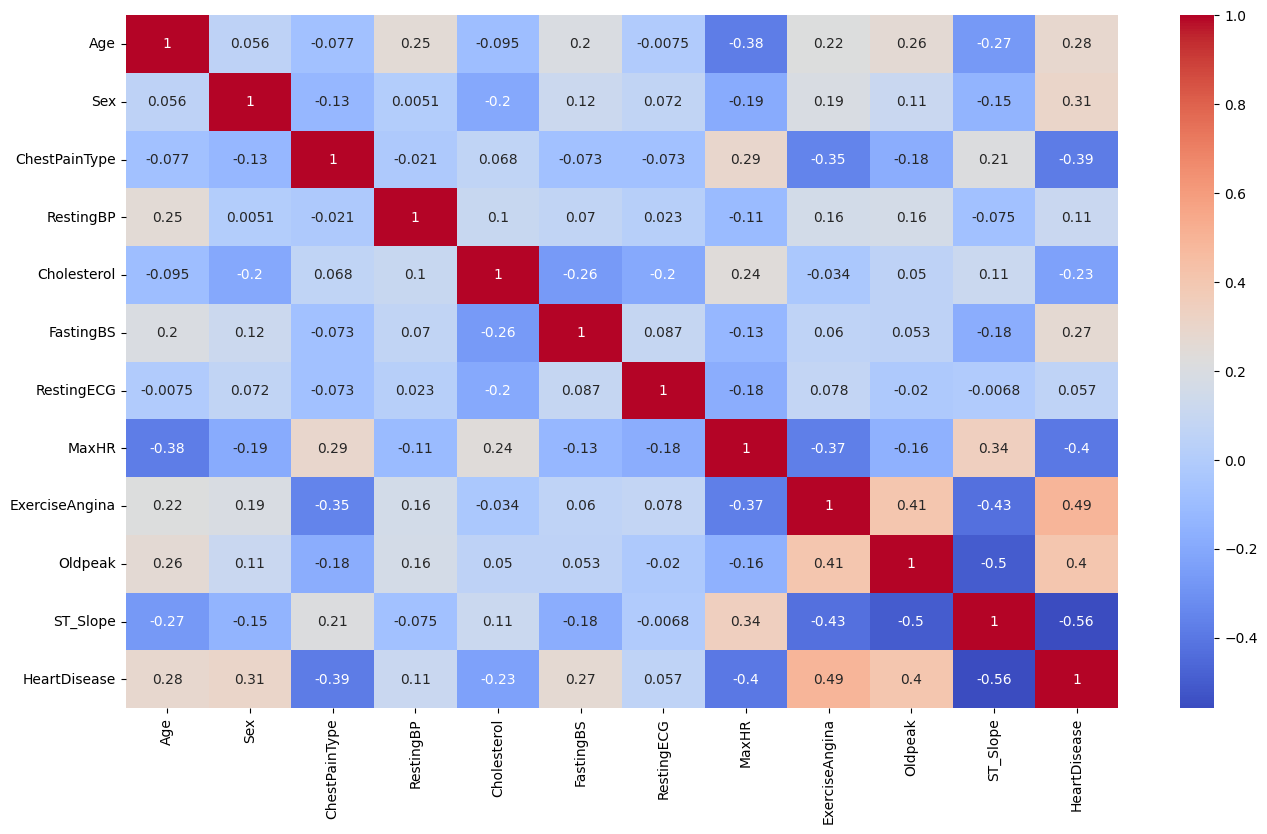

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,9))
sns.heatmap(df1.corr(),annot=True,cmap="coolwarm")

<h2>Data Preparation</h2>

In [19]:
df1.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<h3>Duplicated Data</h3>

In [20]:
f"Number of Duplicated Rows {df1.duplicated().sum()}"

'Number of Duplicated Rows 0'

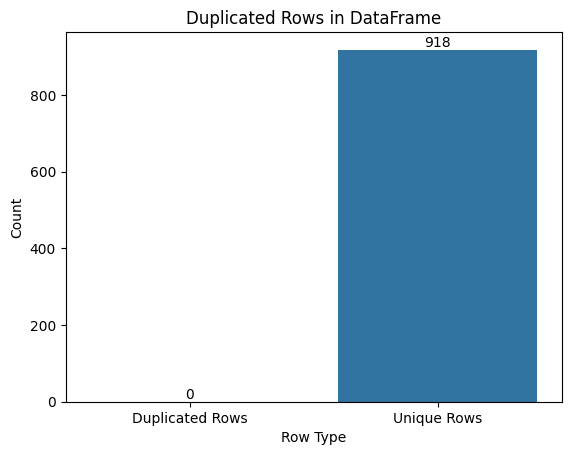

In [21]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already imported the necessary libraries and have the DataFrame `df1` available

# Calculate the count of duplicated rows
duplicated_count = df1.duplicated().sum()
unique_count = len(df1) - duplicated_count

# Create a bar plot using Seaborn
ax = sns.barplot(x=['Duplicated Rows', 'Unique Rows'], y=[duplicated_count, unique_count])

# Set the plot labels and title
plt.xlabel('Row Type')
plt.ylabel('Count')
plt.title('Duplicated Rows in DataFrame')

# Add the count values on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Show the plot
plt.show()


<h3>Correlation between features and heart disease</h3>

In [22]:
df_corr = df1.corr()
df_corr[["HeartDisease"]].sort_values(by=["HeartDisease"])

,HeartDisease
ST_Slope,-0.558771
MaxHR,-0.400421
ChestPainType,-0.386828
Cholesterol,-0.232741
RestingECG,0.057384
RestingBP,0.107589
FastingBS,0.267291
Age,0.282039
Sex,0.305445
Oldpeak,0.403951


<h3>Correlation HeatMap</h3>

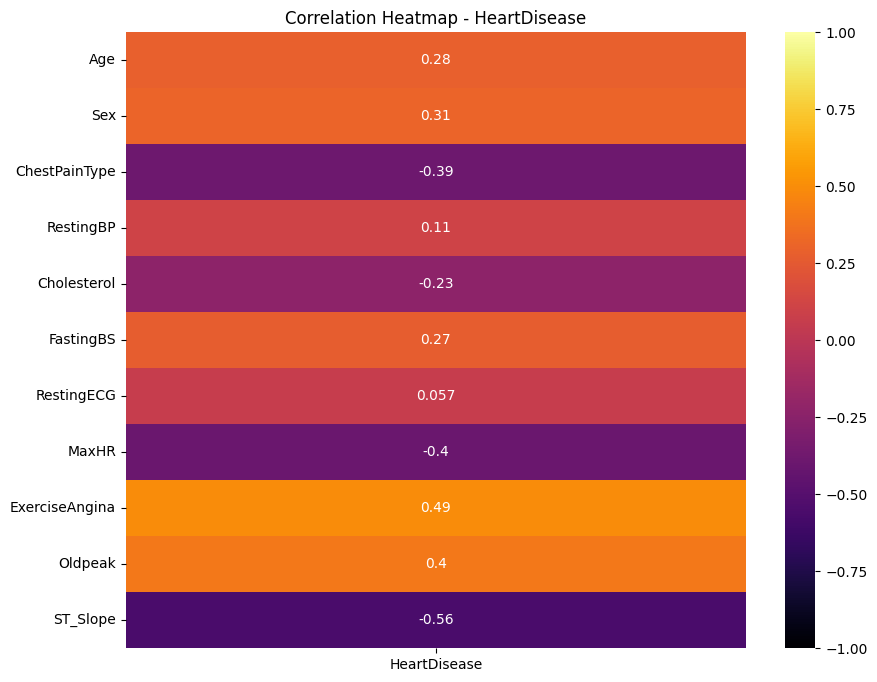

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select correlations of "HeartDisease" column
heart_disease_corr = df1.corr()["HeartDisease"].drop("HeartDisease")

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heart_disease_corr.to_frame(), annot=True, cmap="inferno", vmin=-1, vmax=1)
plt.title("Correlation Heatmap - HeartDisease")
plt.show()


<h3>Separate Data</h3>

In [24]:
df1.dtypes

Age                 int64
Sex                 int32
ChestPainType       int32
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int32
MaxHR               int64
ExerciseAngina      int32
Oldpeak           float64
ST_Slope            int32
HeartDisease        int64
dtype: object

In [25]:
#num_cols = df1.select_dtypes(include=['int64', 'float64']).columns.tolist()[:-1] #Removing [HeartDisease]
#cate_cols = df1.select_dtypes(include=['int32']).columns.tolist()
target = ['HeartDisease']

print("Target Column: ", target)


Target Column:  ['HeartDisease']


<h2>Feature Scaling</h2>

In [26]:
df1.dtypes

Age                 int64
Sex                 int32
ChestPainType       int32
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int32
MaxHR               int64
ExerciseAngina      int32
Oldpeak           float64
ST_Slope            int32
HeartDisease        int64
dtype: object

In [27]:
#scaler = StandardScaler() #scaling in range [-1, 1]
#standard_df = scaler.fit_transform(df1[num_cols])
#standard_df = pd.DataFrame(standard_df, columns = num_cols)
#standard_df

<h3>Merge the new columns to the categorical columns</h3>

In [28]:
#df1 = standard_df.join(df1[cate_cols+target])
df1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [29]:
df1.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


<h2>Building Models</h2>

Split the data into 70% training and 30% testing (to build and evaluate Models)

In [30]:
# Remove rows where 'RestingBP', 'Cholesterol', and 'MaxHR' columns have a value of 0
columns_to_check = ['RestingBP', 'Cholesterol', 'MaxHR']
df1 = df1.loc[df1['Cholesterol'] != 0]
df1 = df1.loc[df1['RestingBP'] != 0]
df1 = df1.loc[df1['MaxHR'] != 0]
df1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [31]:
X = df1.drop(target, axis=1)
y = df1[target]
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [32]:
import pandas as pd

# Assuming you have split your data, and 'test_data' contains your test dataset
# Save the test data to a CSV file
x_test.to_csv('test_data.csv', index=False)  # 'test_data.csv' is the name of the output file


In [33]:
x_test

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
208,28,1,1,130,132,0,0,185,0,0.0,2
259,55,0,1,122,320,0,1,155,0,0.0,2
97,39,1,2,160,147,1,1,160,0,0.0,2
148,50,1,1,120,168,0,1,160,0,0.0,2
567,71,1,0,130,221,0,2,115,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
601,61,1,2,140,284,0,1,123,1,1.3,1
905,67,1,2,152,212,0,0,150,0,0.8,1
665,42,1,0,136,315,0,1,125,1,1.8,1
763,58,1,2,132,224,0,0,173,0,3.2,2


In [34]:
y_test

,HeartDisease
208,0
259,0
97,0
148,0
567,1
...,...
601,1
905,1
665,1
763,1


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a LogisticRegression classifier object
logreg = LogisticRegression()

# Fit the logistic regression model to the training data
logreg.fit(x_train, y_train)

# Make predictions on the test data
y_pred_logreg = logreg.predict(x_test)

# Calculate the accuracy score of the logistic regression classifier
acc_logreg = accuracy_score(y_test, y_pred_logreg)

print('Accuracy score of Logistic Regression Classifier is', acc_logreg)


Accuracy score of Logistic Regression Classifier is 0.84375


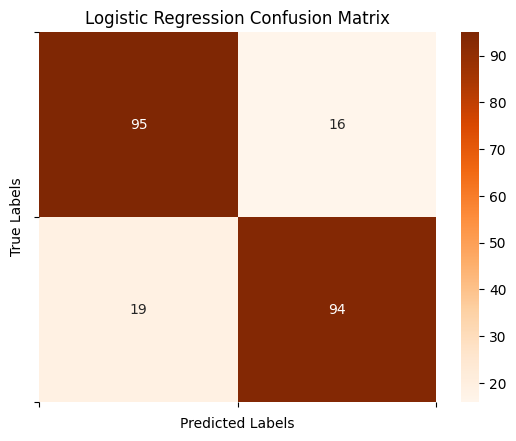

In [36]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_logreg)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Oranges', fmt='d')

# Add labels, title, and ticks to the plot
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Logistic Regression Confusion Matrix')
plt.xticks(ticks=[0, 1, 2])  # Replace with the appropriate class labels
plt.yticks(ticks=[0, 1, 2])  # Replace with the appropriate class labels

# Display the plot
plt.show()

In [37]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create an SVC classifier object
svc = SVC()

# Fit the SVC model to the training data
svc.fit(x_train, y_train)

# Make predictions on the test data
y_pred_svc = svc.predict(x_test)

# Calculate the accuracy score of the SVC classifier
acc_svc = accuracy_score(y_test, y_pred_svc)

print('Accuracy score of SVC Classifier is', acc_svc)



Accuracy score of SVC Classifier is 0.6830357142857143


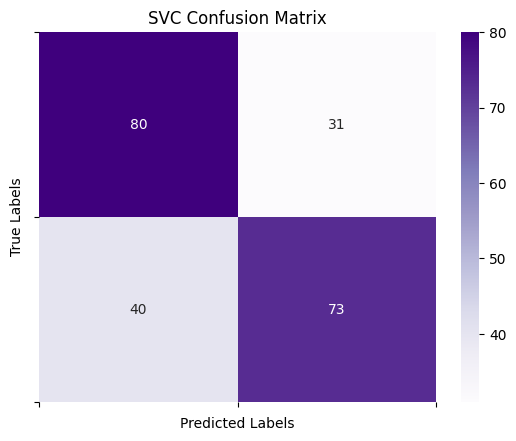

In [38]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_svc)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Purples', fmt='d')

# Add labels, title, and ticks to the plot
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('SVC Confusion Matrix')
plt.xticks(ticks=[0, 1, 2])  # Replace with the appropriate class labels
plt.yticks(ticks=[0, 1, 2])  # Replace with the appropriate class labels

# Display the plot
plt.show()


In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a KNN classifier object
knn = KNeighborsClassifier()

# Fit the KNN model to the training data
knn.fit(x_train, y_train)

# Make predictions on the test data
y_pred_knn = knn.predict(x_test)

# Calculate the accuracy score of the KNN classifier
acc_knn = accuracy_score(y_test, y_pred_knn)

print('Accuracy score of KNN Classifier is', acc_knn)


Accuracy score of KNN Classifier is 0.6294642857142857


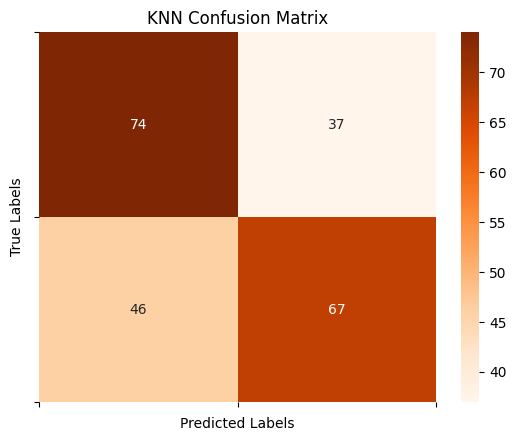

In [40]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Oranges', fmt='d')

# Add labels, title, and ticks to the plot
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('KNN Confusion Matrix')
plt.xticks(ticks=[0, 1, 2])  # Replace with the appropriate class labels
plt.yticks(ticks=[0, 1, 2])  # Replace with the appropriate class labels

# Display the plot
plt.show()


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle

# Create a Random Forest classifier object
rf = RandomForestClassifier()

# Fit the Random Forest model to the training data
rf.fit(x_train, y_train)

# Make predictions on the test data
y_pred_rf = rf.predict(x_test)

# Calculate the accuracy score of the Random Forest classifier
acc_rf = accuracy_score(y_test, y_pred_rf)

print('Accuracy score of Random Forest Classifier is', acc_rf)

# Save the trained model to a pickle file
with open('your_random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf, file)



Accuracy score of Random Forest Classifier is 0.8794642857142857


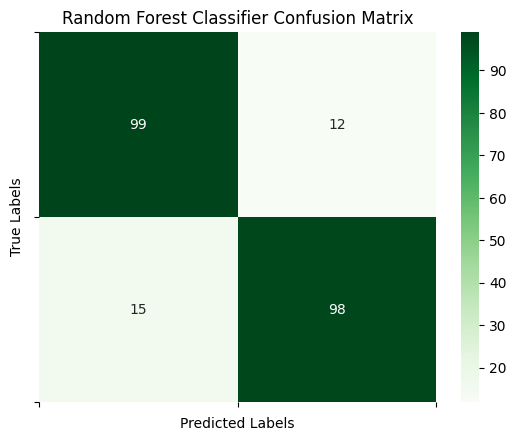

In [42]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Greens', fmt='d')

# Add labels, title, and ticks to the plot
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Random Forest Classifier Confusion Matrix')
plt.xticks(ticks=[0, 1, 2])  # Replace with the appropriate class labels
plt.yticks(ticks=[0, 1, 2])  # Replace with the appropriate class labels

# Display the plot
plt.show()


In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Decision Tree classifier object with max_depth=4
dt = DecisionTreeClassifier(max_depth=4)

# Fit the Decision Tree model to the training data
dt.fit(x_train, y_train)

# Make predictions on the test data
y_pred_dt = dt.predict(x_test)

# Calculate the accuracy score of the Decision Tree classifier
acc_dt = accuracy_score(y_test, y_pred_dt)

print('Accuracy score of Decision Tree Classifier is', acc_dt)


Accuracy score of Decision Tree Classifier is 0.8482142857142857


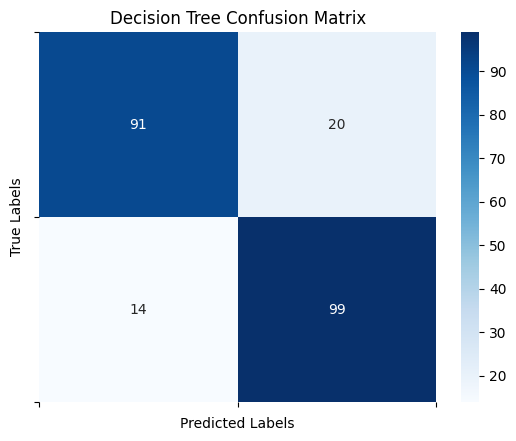

In [44]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

# Add labels, title, and ticks to the plot
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Decision Tree Confusion Matrix')
plt.xticks(ticks=[0, 1, 2])  # Replace with the appropriate class labels
plt.yticks(ticks=[0, 1, 2])  # Replace with the appropriate class labels

# Display the plot
plt.show()


In [45]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Naive Bayes classifier object
nb = GaussianNB()

# Fit the Naive Bayes model to the training data
nb.fit(x_train, y_train)

# Make predictions on the test data
y_pred_nb = nb.predict(x_test)

# Calculate the accuracy score of the Naive Bayes classifier
acc_nb = accuracy_score(y_test, y_pred_nb)

print('Accuracy score of Naive Bayes Classifier is', acc_nb)



Accuracy score of Naive Bayes Classifier is 0.8660714285714286


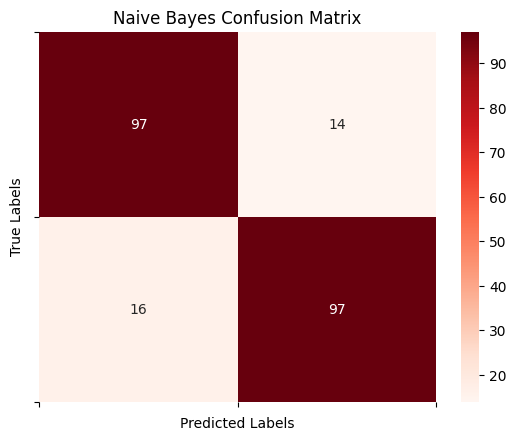

In [46]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_nb)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d')

# Add labels, title, and ticks to the plot
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Naive Bayes Confusion Matrix')
plt.xticks(ticks=[0, 1, 2])  # Replace with the appropriate class labels
plt.yticks(ticks=[0, 1, 2])  # Replace with the appropriate class labels

# Display the plot
plt.show()


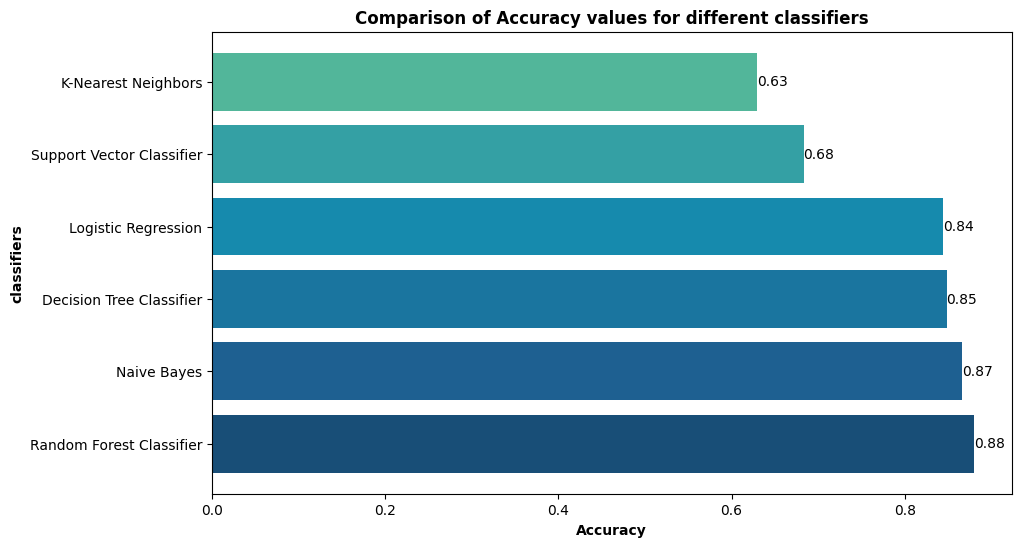

In [47]:
import matplotlib.pyplot as plt

models = ["Logistic Regression", "Support Vector Classifier", "K-Nearest Neighbors", "Random Forest Classifier", "Decision Tree Classifier", "Naive Bayes"]
scores = [acc_logreg, acc_svc, acc_knn, acc_rf, acc_dt, acc_nb]

colors = ["#184e77", "#1e6091", "#1a759f", "#168aad", "#34a0a4", "#52b69a"]

# Sort the models and scores based on scores in descending order
sorted_scores, sorted_models = zip(*sorted(zip(scores, models), reverse=True))

fig, ax = plt.subplots(figsize=(10, 6))  # Increase the figsize for a larger plot
plt.subplots_adjust(left=0.1)  # Adjust the left border

ax.barh(sorted_models, sorted_scores, color=colors)
plt.xlabel("Accuracy", fontweight='bold')
plt.ylabel("classifiers", fontweight='bold')
plt.title("Comparison of Accuracy values for different classifiers", fontweight='bold')

for i, score in enumerate(sorted_scores):
    ax.text(score, i, f"{score:.2f}", ha='left', va='center')

plt.show()


In [48]:
# Import the required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import joblib

# Define the set of classifiers
models = [LogisticRegression(),SVC(), KNeighborsClassifier(), RandomForestClassifier(),
           DecisionTreeClassifier(max_depth=4), GaussianNB()]

# Check the correctness of the list of classifiers
model_names = [type(model).__name__ for model in models]
print(model_names)

# Define a function to evaluate classifiers
def classifiers(models):
    columns = ['Score', 'PPV', 'TNR', 'Predictions']  # Added 'Predictions' to columns
    df_result = pd.DataFrame(columns=columns, index=[type(model).__name__ for model in models])
   
    for model in models:
        clf = model
        print('Initialized classifier {} with default parameters \n'.format(type(model).__name__))    
        clf.fit(x_train, y_train)
        # Save the trained model to a .pkl file
        model_filename = r'C:\Users\anasz\Downloads\heart_failure_detection\model.pkl'
        joblib.dump(clf, model_filename)
        #make a predicitions for entire data(X_test)
        # Load the model from the .pkl file
        loaded_model = joblib.load(model_filename)

        # Use the loaded model for predictions
        predictions = loaded_model.predict(x_test)
        #!predictions = clf.predict(x_test)
        # Use score method to get accuracy of model
        score = clf.score(x_test, y_test)
        print('Score of classifier {} is: {} \n'.format(type(model).__name__, score))
        #df_result['Score']['{}'.format(type(model).__name__)] = str(round(score * 100, 2)) + '%' 
        df_result['Score']['{}'.format(type(model).__name__)] = score
        df_result['Predictions']['{}'.format(type(model).__name__)] = predictions

        confusion_matr=confusion_matrix(y_test,predictions)
        TP = confusion_matr[0,0]
        FP = confusion_matr[0,1]
        FN = confusion_matr[1,0]
        TN = confusion_matr[1,1]
        df_result['PPV']['{}'.format(type(model).__name__)] = TP / (TP + FN) #positive predictive value
        df_result['TNR']['{}'.format(type(model).__name__)] = TN / (TN + FP)  #true negative rate
    return df_result



['LogisticRegression', 'SVC', 'KNeighborsClassifier', 'RandomForestClassifier', 'DecisionTreeClassifier', 'GaussianNB']


In [49]:
classifiers(models)

Initialized classifier LogisticRegression with default parameters 

Score of classifier LogisticRegression is: 0.84375 

Initialized classifier SVC with default parameters 

Score of classifier SVC is: 0.6830357142857143 

Initialized classifier KNeighborsClassifier with default parameters 

Score of classifier KNeighborsClassifier is: 0.6294642857142857 

Initialized classifier RandomForestClassifier with default parameters 

Score of classifier RandomForestClassifier is: 0.875 

Initialized classifier DecisionTreeClassifier with default parameters 

Score of classifier DecisionTreeClassifier is: 0.8482142857142857 

Initialized classifier GaussianNB with default parameters 

Score of classifier GaussianNB is: 0.8660714285714286 



,Score,PPV,TNR,Predictions
LogisticRegression,0.84375,0.833333,0.854545,"[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, ..."
SVC,0.683036,0.666667,0.701923,"[0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, ..."
KNeighborsClassifier,0.629464,0.616667,0.644231,"[0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, ..."
RandomForestClassifier,0.875,0.854701,0.897196,"[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, ..."
DecisionTreeClassifier,0.848214,0.866667,0.831933,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ..."
GaussianNB,0.866071,0.858407,0.873874,"[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, ..."


Initialized classifier LogisticRegression with default parameters 

Score of classifier LogisticRegression is: 0.84375 

Initialized classifier SVC with default parameters 

Score of classifier SVC is: 0.6830357142857143 

Initialized classifier KNeighborsClassifier with default parameters 

Score of classifier KNeighborsClassifier is: 0.6294642857142857 

Initialized classifier RandomForestClassifier with default parameters 

Score of classifier RandomForestClassifier is: 0.875 

Initialized classifier DecisionTreeClassifier with default parameters 

Score of classifier DecisionTreeClassifier is: 0.8482142857142857 

Initialized classifier GaussianNB with default parameters 

Score of classifier GaussianNB is: 0.8660714285714286 



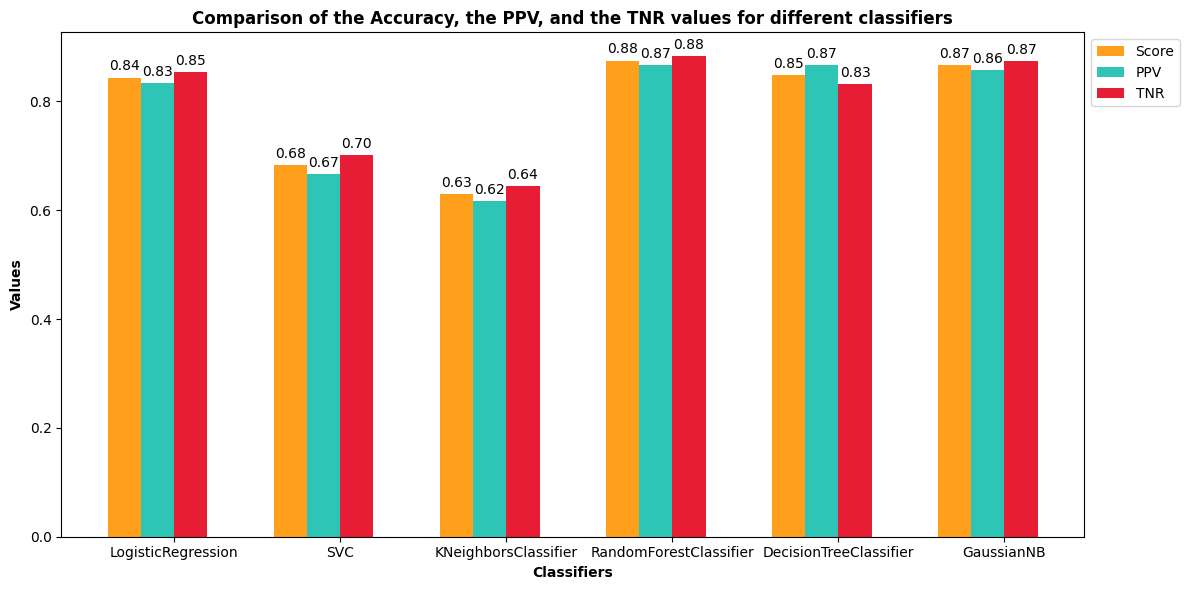

In [50]:

import matplotlib.pyplot as plt
import numpy as np


# Call the classifiers function with your data
result = classifiers(models)

# Extract the required data from the result DataFrame
scores = result['Score'].astype(float)
ppv = result['PPV'].astype(float)
tnr = result['TNR'].astype(float)

# Plotting the bar plot
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(models))
width = 0.20


bars = ax.bar(x, scores, width, label='Score', color='#ff9f1c')
bars1 = ax.bar(x + width, ppv, width, label='PPV', color='#2ec4b6')
bars2 = ax.bar(x + width * 2, tnr, width, label='TNR', color='#e71d36')

# Add the value labels on top of each bar
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(bars)        
autolabel(bars1)
autolabel(bars2)

ax.set_xlabel('Classifiers', fontweight='bold')
ax.set_ylabel('Values', fontweight='bold')
ax.set_xticks(x + width * 1.5)

# Set the x-tick labels in two lines
labels = ['\n'.join(label.split()) for label in result.index]
ax.set_xticklabels(labels, rotation=0)

# Move the legend to the top right without covering the last bar
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Add a title to the plot
ax.set_title('Comparison of the Accuracy, the PPV, and the TNR values for different classifiers', fontweight='bold')

plt.tight_layout()
plt.show()


Initialized classifier LogisticRegression with default parameters 

Initialized classifier SVC with default parameters 

Initialized classifier KNeighborsClassifier with default parameters 

Initialized classifier RandomForestClassifier with default parameters 

Initialized classifier DecisionTreeClassifier with default parameters 

Initialized classifier GaussianNB with default parameters 



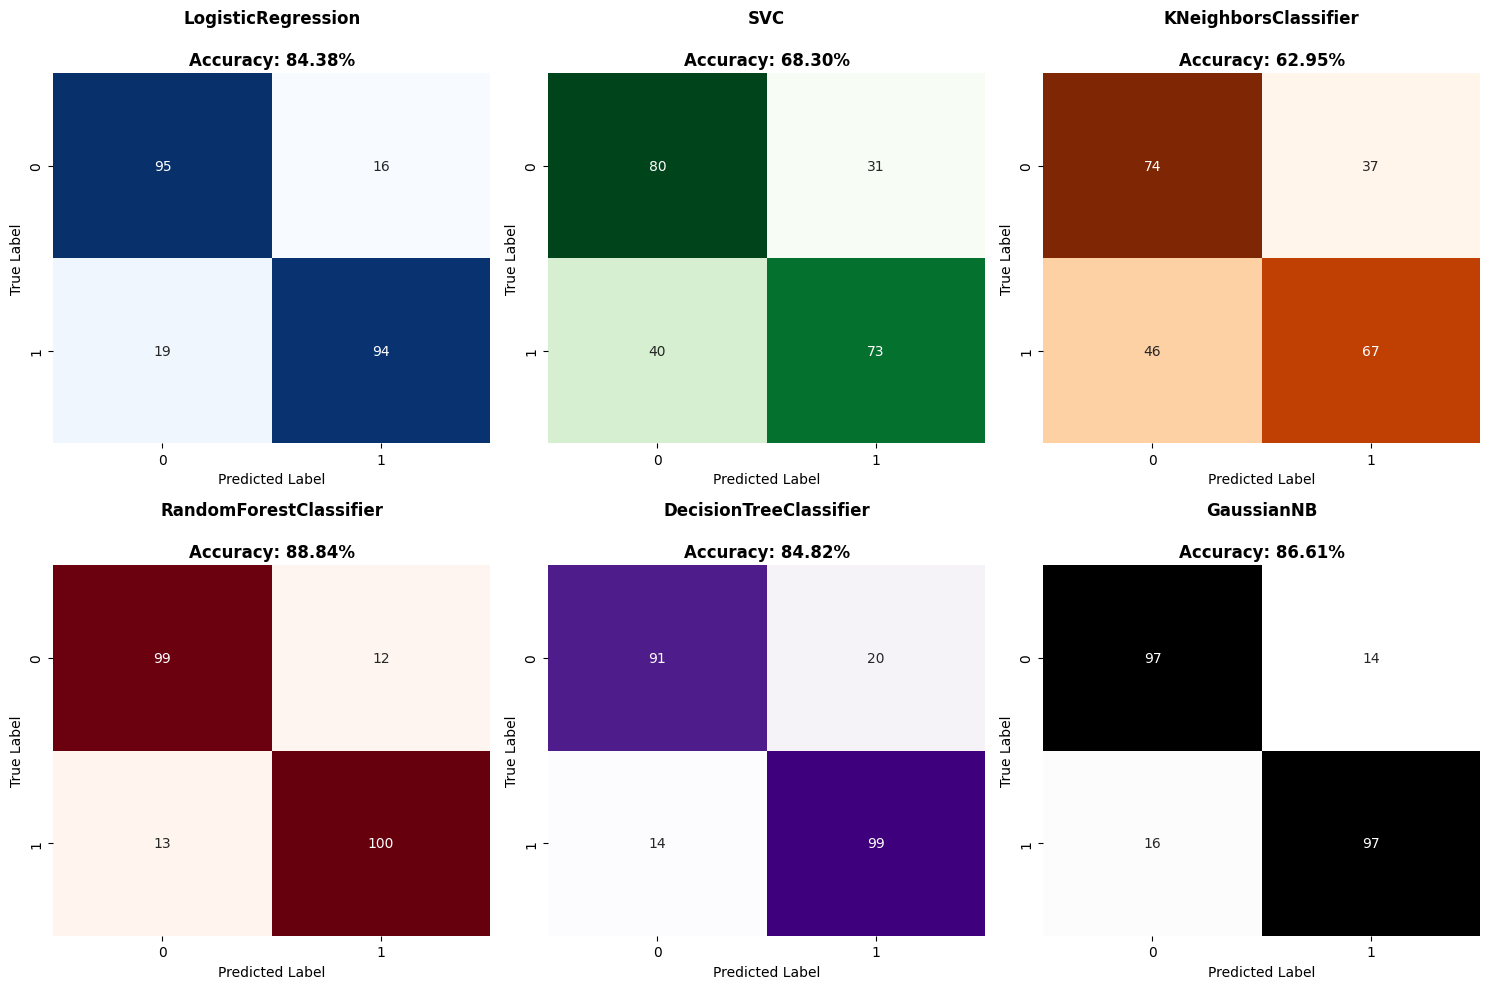

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to plot confusion matrix
def plot_confusion_matrix(ax, confusion_matrix, title, cmap, accuracy):
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap=cmap, cbar=False, ax=ax)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.set_title(f'{title}\n\nAccuracy: {accuracy:.2%}', fontweight='bold')

# Evaluate classifiers and collect confusion matrices
confusion_matrices = []
model_names = []
model_accuracies = []
cmap_list = ['Blues', 'Greens', 'Oranges', 'Reds', 'Purples', 'Greys']  # List of color palettes

for i, model in enumerate(models):
    clf = model
    print('Initialized classifier {} with default parameters \n'.format(type(model).__name__))
    clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)
    confusion_matr = confusion_matrix(y_test, predictions)
    accuracy = clf.score(x_test, y_test)
    confusion_matrices.append(confusion_matr)
    model_names.append(type(model).__name__)
    model_accuracies.append(accuracy)

# Create a figure and subplots
num_models = len(models)
num_cols = 3  # Number of columns in the subplot grid
num_rows = int(np.ceil(num_models / num_cols))  # Number of rows in the subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Plot confusion matrix for each model with a different color palette and accuracy percentage
for i in range(num_models):
    ax = axes[i // num_cols, i % num_cols]
    cmap = cmap_list[i % len(cmap_list)]  # Select a color palette from the list
    plot_confusion_matrix(ax, confusion_matrices[i], model_names[i], cmap, model_accuracies[i])

    # Add model name and accuracy in bold on top of the confusion matrix
    #ax.text(0.5, 1.15, model_names[i], fontweight='bold', fontsize=12, ha='center', transform=ax.transAxes)
    #ax.text(0.5, 1.05, f'Accuracy: {model_accuracies[i]:.2%}', fontweight='bold', fontsize=12, ha='center', transform=ax.transAxes)

# Remove empty subplots if the number of models is not a multiple of num_cols
if num_models % num_cols != 0:
    if num_rows > 1:
        for j in range(num_models % num_cols, num_cols):
            fig.delaxes(axes[num_rows-1, j])
    else:
        for j in range(num_models % num_cols, num_cols):
            fig.delaxes(axes[j])

# Adjust the spacing between subplots and display the plot
plt.tight_layout()
plt.show()


In [52]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
### LogisticRegression
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = KFold(n_splits=10)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.842888 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.827612 (0.041099) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.825726 (0.044803) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.827612 (0.041099) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.827612 (0.041099) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.829499 (0.044222) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.827612 (0.041099) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.831422 (0.044485) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.833382 (0.046137) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.827612 (0.038305) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.839042 (0.044937) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.839042 (0.049630) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.842888 (0.046981) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.800581 (0.056358) wit

In [53]:
### KNeighborsClassifier
# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = KFold(n_splits=3)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.718391 using {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}
0.626437 (0.037540) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.626437 (0.037540) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.636015 (0.053365) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.630268 (0.056764) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.647510 (0.057917) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.637931 (0.058609) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.657088 (0.045576) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.643678 (0.040908) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.655172 (0.032848) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.662835 (0.027496) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.655172

In [54]:
### SVC
# define model and parameters
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = KFold(n_splits=3)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.777778 using {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.777778 (0.047469) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.733716 (0.026683) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.544061 (0.025844) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.712644 (0.029305) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.695402 (0.030771) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.549808 (0.022176) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.693487 (0.031244) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.676245 (0.030531) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.536398 (0.014336) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.599617 (0.028285) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.534483 (0.014078) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.534483 (0.014078) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.534483 (0.014078) with: {'C': 0.01, 'gamma': 'scale',

In [55]:
### RandomForestClassifier
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = KFold(n_splits=3)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.858238 using {'max_features': 'sqrt', 'n_estimators': 100}
0.833333 (0.018770) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.858238 (0.011809) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.856322 (0.004693) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.825670 (0.017766) with: {'max_features': 'log2', 'n_estimators': 10}
0.850575 (0.000000) with: {'max_features': 'log2', 'n_estimators': 100}
0.856322 (0.004693) with: {'max_features': 'log2', 'n_estimators': 1000}
